<a href="https://colab.research.google.com/github/deshwalmahesh/Image-Processing/blob/master/Convolution_Operations_in_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Properties of Convolutions

In [1]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

img = np.random.randint(0,255, (5,5)).astype(np.uint8) # image 5x5
img3_3 = np.random.randint(0,255, (3,3)).astype(np.uint8) # 3x3 Image same size as h1


h1 = np.asarray([[0,1,0],
                 [0,1,0],
                 [0,1,0]], dtype=np.uint8) # kernel of 3x3 -> BTW it is Vertical line Detection

h2 = np.asarray([[0,0,0],
                 [1,1,1],
                 [0,0,0]], dtype=np.uint8) # kernel of 3x3 -> FYI, it is Horizontal Line Detection

h3 = np.random.randint(0,2,(5,5)).astype(np.uint8) # Random 5x5 filter having 0 and ones

# [Commutative](https://thewolfsound.com/mathematical-properties-of-convolution/#commutativity):

## `Convolution(X,H) == Convolution(H,X)`

Hold True if  `X.shape == H.shape`

**ELSE**

You can find `Convolution(H,X)` as a subset of `Convolution(X,H)` if `H.shape < X.shape`

**Note**: Commutativity of convolution makes the ordering of filters in a series irrelevant.

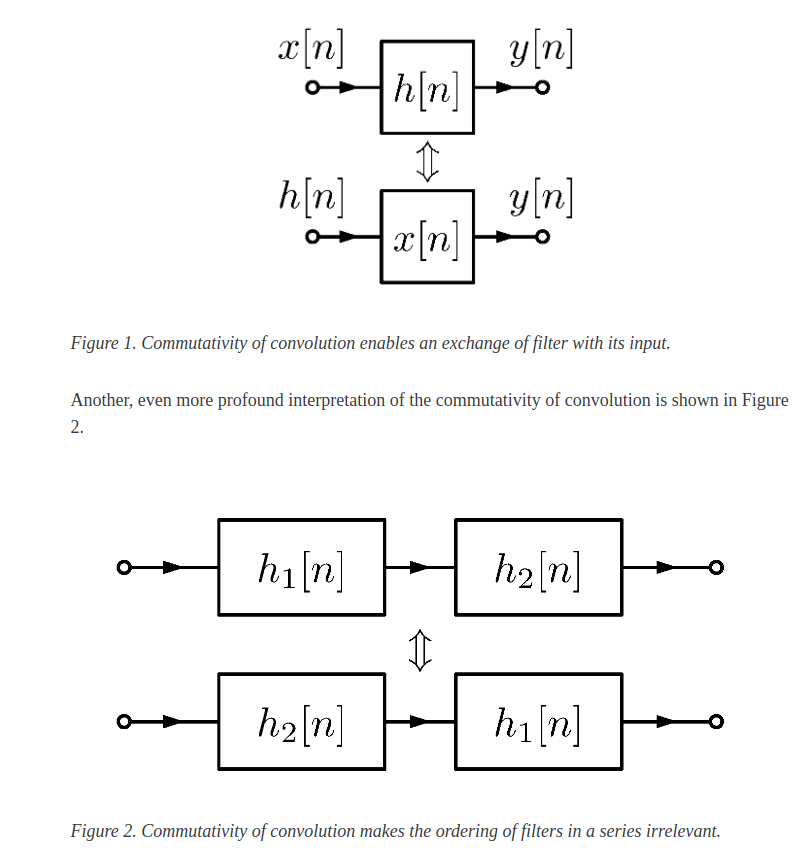

In [2]:
x_h = sig.convolve2d(img, h1, mode="same") # 5x5 image being convolved by 3x3 filter
h_x = sig.convolve2d(h1, img, mode="same") # 3x3 Kernal being convolved by 5x5 image

print(x_h, "\n\n","-"*50, "\n\n",h_x) # look from (1,1) to (3,3)

[[164 153 193 226 206]
 [ 93 235  86  54 115]
 [ 51 183 119  43 202]
 [119 212   1 188 231]
 [190 130 108 104  66]] 

 -------------------------------------------------- 

 [[235  86  54]
 [183 119  43]
 [212   1 188]]


[[245 185  51]
 [ 34  88 133]
 [ 12 232  58]] 

 -------------------- 

 [[245 185  51]
 [ 34  88 133]
 [ 12 232  58]]


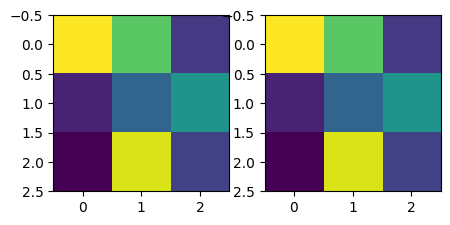

In [3]:
x_h = sig.convolve2d(img3_3, h1, mode="same")  #3x3 Image
h_x = sig.convolve2d(h1, img3_3, mode="same") # 3x3 filter

print(x_h, "\n\n","-"*20, "\n\n", h_x) # Both are equal

f,ax = plt.subplots(1,2, figsize = (5,3))

ax[0].imshow(x_h)
ax[1].imshow(h_x)
plt.show()

# [Associative](https://thewolfsound.com/mathematical-properties-of-convolution/#associativity):

## `Convolution(X, Convolution(H1,H2))  == Convolution(Convolution(X,H1), H2)`

**NOTE**: It holds True whether Image `X.shape` is of same shape as Filter / Kernel Shape (`H1.shape` or `H2.shape`) as long as

`H1.shape == H2.shape`

**BUT**

Doesn't hold true if `H1.shape != H2.shape`

**IDEA**: What does it mean? It can mean that if you have multiple kernels (`Conv2D layers`) trained seperately but in order to make the computation faster, you fuse them during Inference.

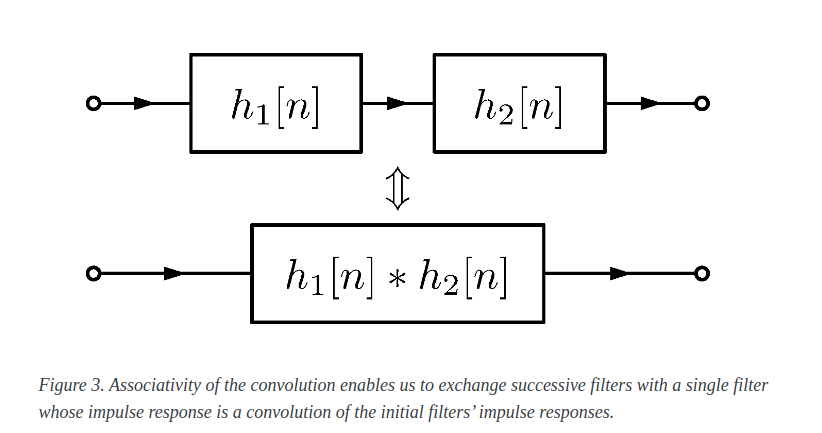

[[ 61 254  60 113 176]
 [ 72 158 119 255 169]
 [234  97  89 108 245]
 [ 75  76 145 164 163]
 [ 64 172  86  22 170]] 

 -------------------------------------------------- 

 [[ 61 254  60 113 176]
 [ 72 158 119 255 169]
 [234  97  89 108 245]
 [ 75  76 145 164 163]
 [ 64 172  86  22 170]]


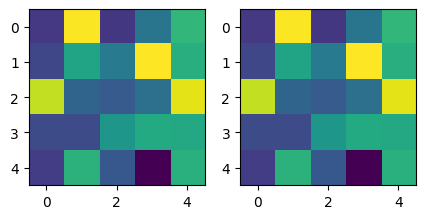

In [4]:
x_h1h2 = sig.convolve2d(img, sig.convolve2d(h1, h2, mode="same"), mode = "same")
xh1_h2 = sig.convolve2d(sig.convolve2d(img, h1, mode="same"), h2, mode = "same")

print(x_h1h2, "\n\n","-"*50, "\n\n",xh1_h2)

f,ax = plt.subplots(1,2, figsize = (5,3))
ax[0].imshow(x_h1h2)
ax[1].imshow(xh1_h2)
plt.show()

# [Linearity](https://thewolfsound.com/mathematical-properties-of-convolution/#linearity)

## `alpha * Convolution(X,H1 + H2) == Convolution(alpha * X, H1) + Convolution(alpha * X, H1)`

**NOTE**: Obviously it won't work where `H1.shape != H2.shape` but will definitely work if `X.shape != H1.shape`

**INFO**: There are 2 more properties which arise from Linearity which are Scaler Multiplication and Distributive (given below)

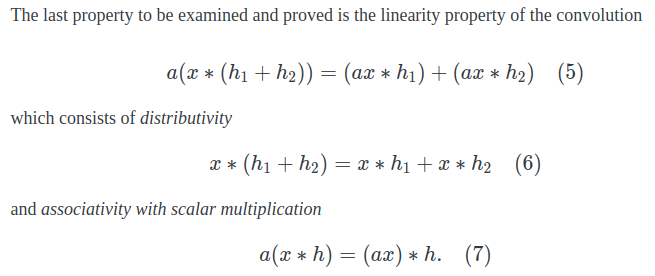

[[ 20  36  56 190 120]
 [ 88 240   6 156 242]
 [108 102 244  58 158]
 [166  16 140 132 106]
 [236   4  18 192 212]] 

 -------------------- 

 [[ 88  84  92 212 216]
 [108 132  84   0 232]
 [220 128 156  24 116]
 [  0 144   4  88 200]
 [  0 224 180  96 128]]


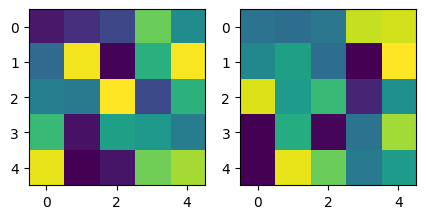

In [9]:
alpha = 10
h1_plus_h2 = h1 + h2

lhs = alpha * sig.convolve2d(img, h1_plus_h2, mode="same")
rhs = sig.convolve2d(alpha * img, h2, mode="same") + sig.convolve2d(alpha * img, h2, mode="same")  # Addition of Horizontal Lines Kernel  + Vertical lines Kernel

print(lhs, "\n\n","-"*20, "\n\n", rhs) # Both are equal

f,ax = plt.subplots(1,2, figsize = (5,3))

ax[0].imshow(lhs)
ax[1].imshow(rhs)
plt.show()

# Scaler Multiplication

## `alpha * Convolution(X,H) == Convolution(alpha * X, H)`



**Interestingly**: It works even if `X.shape != H.shape`

[[104 250 138 212  12]
 [162  46  92  28 126]
 [254  38 166 174 228]
 [166  72  10  88   6]
 [108  20  56  16 148]] 

 -------------------- 

 [[104 250 138 212  12]
 [162  46  92  28 126]
 [254  38 166 174 228]
 [166  72  10  88   6]
 [108  20  56  16 148]]


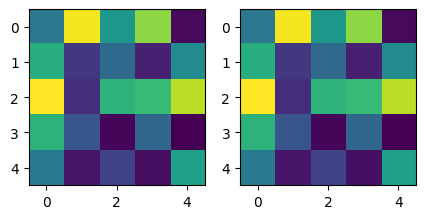

In [5]:
alpha = 10 # can be any scaler

lhs = alpha * sig.convolve2d(img, h1, mode="same") # Image here is 5x5 and Kernel is 3x3
rhs = sig.convolve2d(alpha * img, h1, mode="same")

print(lhs, "\n\n","-"*20, "\n\n", rhs) # Both are equal

f,ax = plt.subplots(1,2, figsize = (5,3))

ax[0].imshow(lhs)
ax[1].imshow(rhs)
plt.show()

# Distributivity : MOST IMPORTANT

## `Convolution(X,H1 + H2) == Convolution(X, H1) + Convolution(X,H2)`


**NOTE**: It works only and only when `H1.shape == H2.shape`

**INTERESTINGLY**: Due to this, you can merge to parallel Kernels weights (like VGG etc in a same) into one during inference which saves the time in multiples in no of parallel branches. Also, if you use the Scaler property, you can fuse `Batch Norm` into the kernel itself so it'll be even faster.

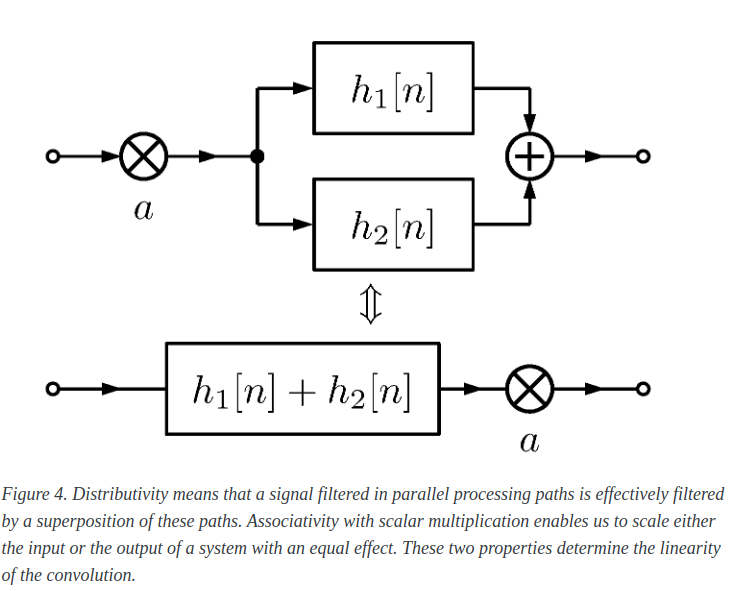

[[130 106 108 147 140]
 [188  24 231 246 101]
 [ 62  87 178 185 195]
 [247 104 142 218 241]
 [126 154  53  96 226]] 

 -------------------- 

 [[130 106 108 147 140]
 [188  24 231 246 101]
 [ 62  87 178 185 195]
 [247 104 142 218 241]
 [126 154  53  96 226]]


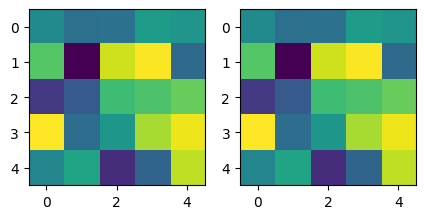

In [6]:
h1_plus_h2 = h1 + h2

lhs = sig.convolve2d(img, h1_plus_h2, mode="same")
rhs = sig.convolve2d(img, h1, mode="same") + sig.convolve2d(img, h2, mode="same")  # Addition of Horizontal Lines Kernel  + Vertical lines Kernel

print(lhs, "\n\n","-"*20, "\n\n", rhs) # Both are equal

f,ax = plt.subplots(1,2, figsize = (5,3))

ax[0].imshow(lhs)
ax[1].imshow(rhs)
plt.show()

# Fuse Batch normalization into the Kernel itself during Inference

**STEPS**:
1. Kernel `h_fused` is calculated by scaling the original `h` by `gamma/sigma`. Since BN computes `mu,sigmma` per Channel, do the same thing channel wise `h_i`, `gamma_i`, `sigma_i` where `i` is the `i-th` channel

2. Similarly, bew bias term `b` or `b_i` is calculated by subtracting `mu_i * gamma_i/sigma_i` from the original `b_i`.


**NOTE**: Please someone correct the code if it's wrong OR if it's right, make it in Pytorch for atleast RGB

In [55]:
# Assume Batch norm parameters
mu = 0.3
sigma = 1.3
gamma = 2
beta = 1

# Fuse kernel
h1_fused = h1 * (gamma / sigma)

# Fuse bias
b = beta - (mu * (gamma / sigma))

# Convolve fused kernel + bias
final_image = sig.convolve2d(img, h1_fused, mode="same")
final_image += b # Add the Bias to the convolution (if present but we don't use it with Batch Norm)

final_image


array([[446.69230769, 340.53846154, 275.92307692, 442.07692308,
         52.84615385],
       [819.        , 380.53846154, 628.23076923, 592.84615385,
        165.15384615],
       [715.92307692, 323.61538462, 711.30769231, 514.38461538,
        382.07692308],
       [891.30769231, 651.30769231, 655.92307692, 382.07692308,
        700.53846154],
       [519.        , 611.30769231, 303.61538462, 231.30769231,
        588.23076923]])